In [3]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import random

In [4]:
data_dir = Path('../data')
images_dir = data_dir / "train" / "images"
labels_dir = data_dir / "train" / "labels"
image_paths = list(images_dir.glob("*.jpg"))
label_paths = sorted(labels_dir.glob("*.txt"))
yaml_path = data_dir / 'data.yaml'

with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml['names']


In [12]:
resolutions = []

for image_path in image_paths:
    img = cv2.imread(str(image_path))
    h, w, _ = img.shape
    resolutions.append((w, h))

unique_resolutions = set(resolutions)
print("Image resolutions:", unique_resolutions)

Image resolutions: {(416, 416)}


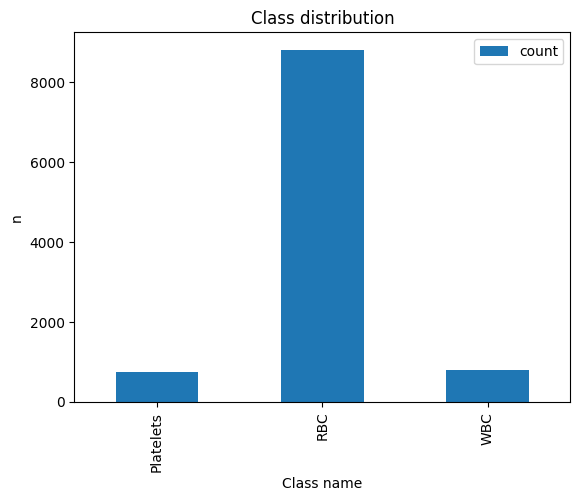

In [6]:
class_counter = {
    0: 0,
    1: 0,
    2: 0
}

for label_f in label_paths:
    with open(label_f, "r") as f:
        lines = f.readlines()
    for line in lines:
        class_counter[int(line.split()[0])] += 1

for i in range(len(class_names)):
    class_counter[class_names[i]] = class_counter.pop(i)

df = pd.DataFrame.from_dict(class_counter, orient="index", columns=["count"])
ax = df.plot(kind="bar")
plt.xlabel("Class name")
plt.ylabel("n")
plt.title("Class distribution")
plt.savefig('../images/train_class_distribution.png')
plt.show()

In [7]:
data = []

for label_f in label_paths:
    with open(label_f, "r") as f:
        lines = f.readlines()
    classes = len(set([x.split()[0] for x in lines]))
    data.append([label_f,len(lines), classes])

df = pd.DataFrame(data, columns=['File', 'Objects detected', 'Classes detected'])
df.head(10)

,File,Objects detected,Classes detected
0,../data/train/labels/BloodImage_00001_jpg.rf.1...,19,2
1,../data/train/labels/BloodImage_00001_jpg.rf.2...,19,2
2,../data/train/labels/BloodImage_00001_jpg.rf.3...,19,2
3,../data/train/labels/BloodImage_00002_jpg.rf.3...,16,2
4,../data/train/labels/BloodImage_00002_jpg.rf.7...,16,2
5,../data/train/labels/BloodImage_00002_jpg.rf.8...,16,2
6,../data/train/labels/BloodImage_00003_jpg.rf.8...,17,3
7,../data/train/labels/BloodImage_00003_jpg.rf.9...,17,3
8,../data/train/labels/BloodImage_00003_jpg.rf.e...,17,3
9,../data/train/labels/BloodImage_00005_jpg.rf.9...,22,3


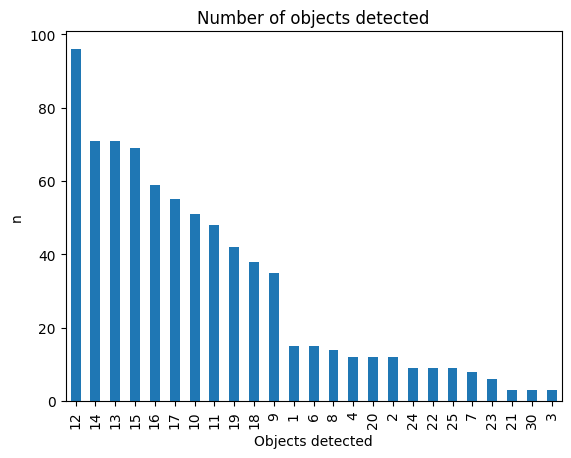

In [14]:
df['Objects detected'].value_counts().plot(kind='bar')
plt.ylabel("n")
plt.title("Number of objects detected")
plt.savefig('../images/train_objects_count.png')

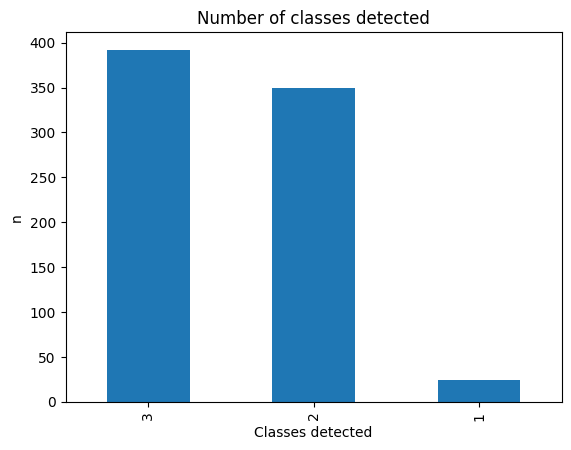

In [15]:
df['Classes detected'].value_counts().plot(kind='bar')
plt.ylabel("n")
plt.title("Number of classes detected")
plt.savefig('../images/train_classes_count.png')

Image name: BloodImage_00137_jpg.rf.81afc7344f954bd429d63f98e07f0e00
Objects detected: 6
Number of Platelets detected: 0
Number of RBC detected: 5
Number of WBC detected: 1


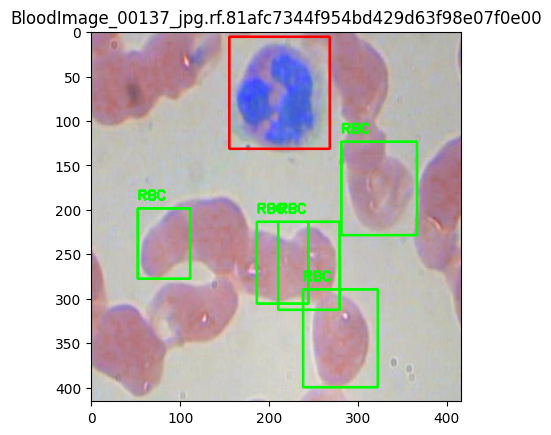

Image name: BloodImage_00136_jpg.rf.5aae172513349593279ab5ab8684a119
Objects detected: 12
Number of Platelets detected: 2
Number of RBC detected: 9
Number of WBC detected: 1


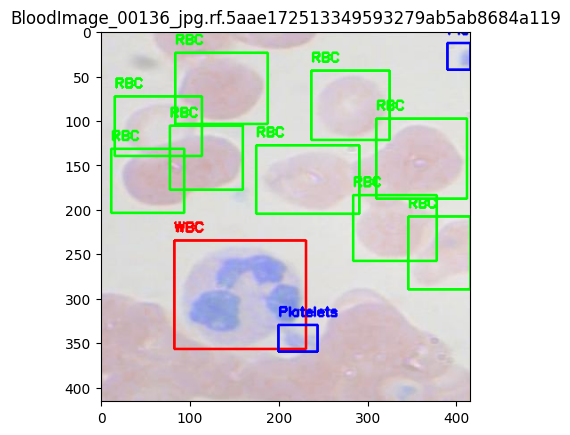

Image name: BloodImage_00294_jpg.rf.0d28b0eb2be965706a9bf89a4dfc943e
Objects detected: 11
Number of Platelets detected: 0
Number of RBC detected: 10
Number of WBC detected: 1


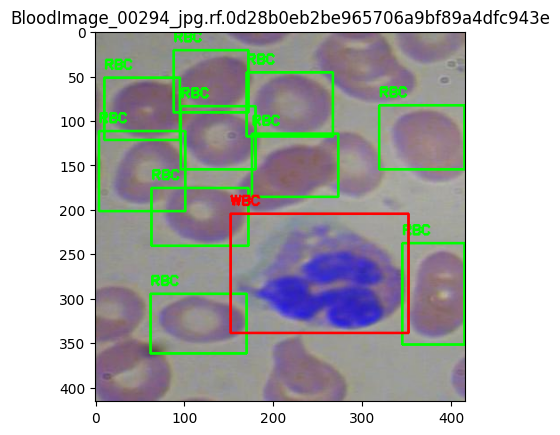

In [11]:
n_images = 3
random.shuffle(image_paths)
random_images = image_paths[:n_images]

border_colors = {
    0: (255, 0, 0),
    1: (0, 255, 0),
    2: (0, 0, 255)
}


for i, i_image in enumerate(random_images):
    i_labels = Path(labels_dir) / f'{i_image.stem}.txt'
    
    image = cv2.imread(str(i_image))
    height, width, _ = image.shape

    class_counter = {
        0: 0,
        1: 0,
        2: 0
    }
    objects_detected = 0

    with open(i_labels, 'r') as label_file:
        for line in label_file.readlines():
            objects_detected += 1
            object_details = line.split(' ')
            class_id = int(object_details[0])
            class_counter[class_id] += 1
            border_color = border_colors[class_id]
            border_thickness = 2
            class_name = class_names[class_id]
            x = float(object_details[1])    # X coordinate of the object's center point
            y = float(object_details[2])    # Y coordinate of the object's center point
            w = float(object_details[3])    # width of the object
            h = float(object_details[4])    # height of the object  
            start_point = (int((x - 0.5 * w) * width), int((y - 0.5 * h) * height))
            end_point = (int((x + 0.5 * w) * width), int((y + 0.5 * h) * height))
            image = cv2.rectangle(image, start_point, end_point, border_color, border_thickness)
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_scale = 0.5
            font_color = border_color
            font_thickness = border_thickness
            image = cv2.putText(image, class_names[class_id], (start_point[0], start_point[1] - 10), font, font_scale, font_color, font_thickness)
        print(f'Image name: {i_image.stem}')
        print(f'Objects detected: {objects_detected}')
        for key, value in class_counter.items():
            print(f'Number of {class_names[key]} detected: {value}')
        plt.title(str(i_image.stem))
        plt.savefig(f'../images/train_image_{i}.png')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
